## Trabajo Práctico $\mathbb{II}$
Inferencia y Estimación

In [40]:
import numpy as np
from math import ceil, log2
from matplotlib import pyplot as plt
from pathlib import Path
from huffman_code import huffman_code # código provisto por la cátedra

filepath = Path('text_examples') 

strings = [] # lista con los textos de ejemplo
for file in filepath.glob('*.txt'):
    with file.open('r', encoding='utf-8') as f:
        strings.append(f.read())

#### $\boldsymbol{(1)}$ $p(x):$ masa de probabilidad de caracteres

In [41]:
def char_pmf(txt: str) -> dict[str|float]:
    ''' Dado una cadena de texto devuelve un diccionario representando la masa de probabilidad de cada caracter en la cadena
    Args:
        txt (str): cadena de texto
    Returns:
        pmf (dict[str|float]): masa de probabilidad estimada
    '''
    n = len(txt)
    pmf = {}
    for c in txt.strip():
        if c not in pmf and c:
            pmf[c] = 1/n
        else:
            pmf[c] += 1/n
    return pmf

def pmf_chart(pmf : dict, fig: plt.Figure = None, idx: int = None):
    if fig is None:
        fig = plt.figure(figsize=(10,6))
    if idx is None: idx = 111
    ax = fig.add_subplot(idx)
    ax.bar(pmf.keys(), pmf.values())
    ax.grid()

Resultado para los textos de ejemplo

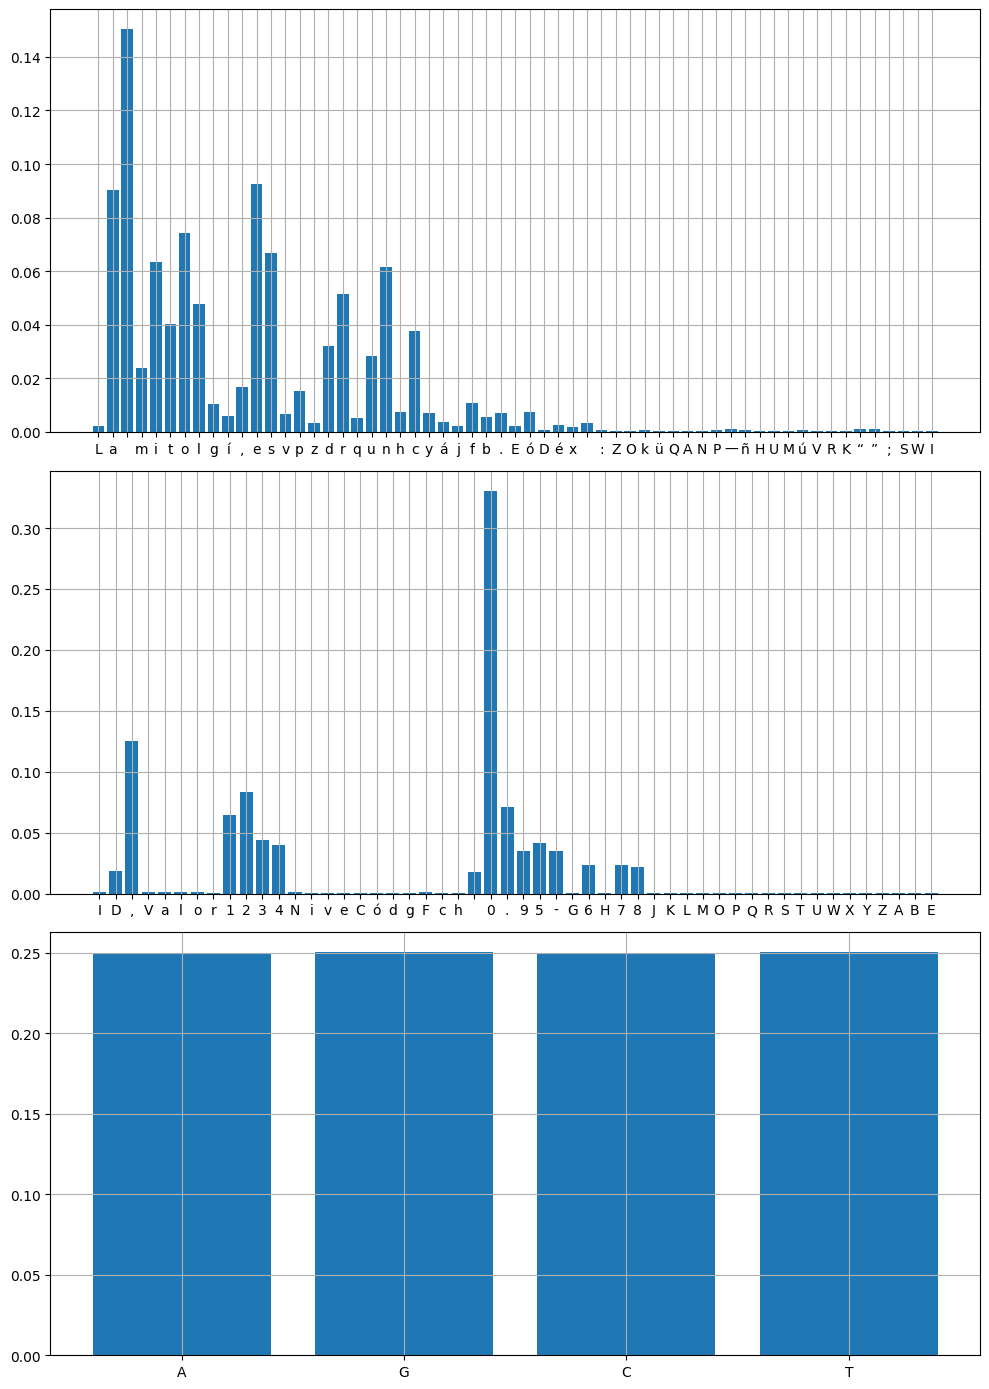

In [42]:
fig = plt.figure(figsize=(10,14))
idx = 311
for string in strings:
    pmf = char_pmf(string)
    pmf_chart(pmf, fig, idx)
    idx += 1
plt.tight_layout()
plt.show()

#### $\boldsymbol{(2)}$ Codificación de Huffman

In [43]:
pmf0 = char_pmf(strings[0])
pmf1 = char_pmf(strings[1])
pmf2 = char_pmf(strings[2])

huffman0 = huffman_code(pmf0)
huffman1 = huffman_code(pmf1)
huffman2 = huffman_code(pmf2)

# Logitud promedio de bits

L0 = 0

for value in huffman0:
    prob =  pmf0.get(value)
    L0 += prob * len(huffman0.get(value))

L1 = 0

for value in huffman1:
    prob =  pmf1.get(value)
    L1 += prob * len(huffman1.get(value))

L2 = 0

for value in huffman2:
    prob =  pmf2.get(value)
    L2 += prob * len(huffman2.get(value))

print(huffman0)
print(L0)

print('\n----------------------\----------------------\----------------------\n')
print(huffman1)
print(L1)

print('\n----------------------\----------------------\----------------------\n')
print(huffman2)
print(L2)

{'e': '000', 'g': '001000', 'f': '001001', 'm': '00101', 'l': '0011', 'r': '0100', 'b': '0101000', ':': '0101001000', 'k': '0101001001', 'P': '0101001010', 'ñ': '0101001011', 'ú': '0101001100', 'Z': '01010011010', 'A': '01010011011', 'N': '01010011100', 'K': '01010011101', 'S': '01010011110', 'W': '01010011111', 'í': '0101010', 'v': '0101011', 'z': '01011000', '\n': '01011001', 'y': '0101101', '.': '0101110', 'ó': '0101111', 'u': '01100', 'O': '011010000000', 'ü': '011010000001', 'Q': '011010000010', 'H': '011010000011', 'U': '011010000100', 'M': '011010000101', 'V': '011010000110', 'R': '011010000111', 'x': '011010001', 'á': '01101001', 'h': '0110101', 'p': '011011', 'n': '0111', 'i': '1000', 's': '1001', 'd': '10100', ',': '101010', 'L': '101011000', 'j': '101011001', 'E': '101011010', ';': '101011011000', 'I': '101011011001', 'D': '10101101101', '—': '1010110111', 'q': '10101110', 'é': '101011110', '“': '1010111110', '”': '1010111111', 'o': '1011', ' ': '110', 'c': '11100', 't': '11

In [44]:
# Cantidad de bits minima (enteros) para representar los N simbolos del texto con una codificacion uniforme

# Como la medida es en Enteros, tomo el techo de la operacion 1/probabilidad_de_ocurrencia (que es la definicion de la cantidad de bits necesarias para representar, en este caso, un simbolo).

resultado0 = {}

for value in pmf0: 
    probabilidad = pmf0.get(value)
    cantidad_de_bits = ceil(log2(1/probabilidad))
    resultado0[value] = cantidad_de_bits


resultado1 = {}

for value in pmf1: 
    probabilidad = pmf1.get(value)
    cantidad_de_bits = ceil(log2(1/probabilidad))
    resultado1[value] = cantidad_de_bits


resultado2 = {}

for value in pmf2: 
    probabilidad = pmf2.get(value)
    cantidad_de_bits = ceil(log2(1/probabilidad))
    resultado2[value] = cantidad_de_bits

print(resultado0)
print(resultado1)
print(resultado2)

{'L': 9, 'a': 4, ' ': 3, 'm': 6, 'i': 4, 't': 5, 'o': 4, 'l': 5, 'g': 7, 'í': 8, ',': 6, 'e': 4, 's': 4, 'v': 8, 'p': 7, 'z': 9, 'd': 5, 'r': 5, 'q': 8, 'u': 6, 'n': 5, 'h': 8, 'c': 5, 'y': 8, 'á': 9, 'j': 9, 'f': 7, 'b': 8, '.': 8, 'E': 9, 'ó': 8, 'D': 11, 'é': 9, 'x': 10, '\n': 9, ':': 11, 'Z': 12, 'O': 13, 'k': 11, 'ü': 13, 'Q': 13, 'A': 12, 'N': 12, 'P': 11, '—': 10, 'ñ': 11, 'H': 13, 'U': 13, 'M': 13, 'ú': 11, 'V': 13, 'R': 13, 'K': 12, '“': 10, '”': 10, ';': 13, 'S': 12, 'W': 12, 'I': 13}
{'I': 11, 'D': 6, ',': 3, 'V': 10, 'a': 11, 'l': 11, 'o': 11, 'r': 11, '1': 4, '2': 4, '3': 5, '4': 5, 'N': 11, 'i': 12, 'v': 13, 'e': 12, 'C': 11, 'ó': 13, 'd': 13, 'g': 13, 'F': 11, 'c': 13, 'h': 13, '\n': 6, '0': 2, '.': 4, '9': 5, '5': 5, '-': 5, 'G': 11, '6': 6, 'H': 11, '7': 6, '8': 6, 'J': 11, 'K': 11, 'L': 11, 'M': 11, 'O': 11, 'P': 11, 'Q': 11, 'R': 11, 'S': 11, 'T': 11, 'U': 11, 'W': 11, 'X': 11, 'Y': 11, 'Z': 11, 'A': 11, 'B': 11, 'E': 11}
{'A': 3, 'G': 2, 'C': 3, 'T': 2}


#### $\boldsymbol{(3)}$ $H(X):$ Entropía de los textos

#### $\boldsymbol{(4)}$ $\eta:$ Entropía normalizada

$$
\eta = \frac{H(X)}{\log_2(N)}, \quad {\small N: \text{cantidad de símbolos}}
$$